In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
tf.config.list_physical_devices('GPU')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, MaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding, Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Precision, Recall

In [2]:
from tensorflow.keras.callbacks import TensorBoard

In [3]:
df = pd.read_parquet('clean_data.pqt')

In [4]:
X= df['comment_text']
y= df.drop(['id','comment_text'], axis=1)
print(y)

X_train, X_valid, ytrain, yvalid = train_test_split(X,y,test_size=.3, random_state=77)
print(X_train.shape[0])
print(X_valid.shape[0]) 

        toxic  severe_toxic  obscene  threat  insult  identity_hate
0           0             0        0       0       0              0
1           0             0        0       0       0              0
2           0             0        0       0       0              0
3           0             0        0       0       0              0
4           0             0        0       0       0              0
...       ...           ...      ...     ...     ...            ...
159566      0             0        0       0       0              0
159567      0             0        0       0       0              0
159568      0             0        0       0       0              0
159569      0             0        0       0       0              0
159570      0             0        0       0       0              0

[159571 rows x 6 columns]
111699
47872


In [5]:
MAX_VOCAB_SIZE = 200000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_valid = tokenizer.texts_to_sequences(X_valid)

In [6]:
word2idx = tokenizer.word_index
V = len(word2idx)
print(V)

150507


In [7]:
data_train = pad_sequences(sequences_train)
print(data_train.shape)
T= data_train.shape[1]
data_valid = pad_sequences(sequences_valid, maxlen=T)
print(data_valid.shape)

(111699, 1250)
(47872, 1250)


In [8]:
filename= "RNN_00_r"
tb = TensorBoard(log_dir= "logs\\{}".format(filename))

In [9]:
D=60
M= 35

i = Input(shape=(T,))
x= Embedding(V+1, D) (i)
x= LSTM(M, return_sequences=True)(x)
x= GlobalMaxPooling1D()(x)
x= Dense(6, activation='softmax')(x)

model= Model(i,x)

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[ 'accuracy',Recall(name='recall'),Precision(name='precision')])

r= model.fit(data_train, ytrain, epochs=20, validation_data=(data_valid, yvalid), callbacks=[tb])

Epoch 1/20
3491/3491 [==============================] - 200s 56ms/step - loss: 0.0944 - accuracy: 0.9697 - recall: 0.3072 - precision: 0.1331 - val_loss: 0.0525 - val_accuracy: 0.9943 - val_recall: 0.4338 - val_precision: 0.1128
Epoch 2/20
3491/3491 [==============================] - 189s 54ms/step - loss: 0.0446 - accuracy: 0.9938 - recall: 0.4294 - precision: 0.1384 - val_loss: 0.0507 - val_accuracy: 0.9937 - val_recall: 0.4248 - val_precision: 0.1307
Epoch 3/20
3491/3491 [==============================] - 188s 54ms/step - loss: 0.0369 - accuracy: 0.9933 - recall: 0.4334 - precision: 0.1484 - val_loss: 0.0507 - val_accuracy: 0.9943 - val_recall: 0.4345 - val_precision: 0.1166
Epoch 4/20
3491/3491 [==============================] - 194s 55ms/step - loss: 0.0314 - accuracy: 0.9845 - recall: 0.4353 - precision: 0.1429 - val_loss: 0.0526 - val_accuracy: 0.9809 - val_recall: 0.4279 - val_precision: 0.1353
Epoch 5/20
3491/3491 [==============================] - 195s 56ms/step - loss: 0.027

In [11]:
def history_plots(redux, metric):
    valid = "val_"+metric
    plt.plot(redux.history[metric], label=metric)
    plt.plot(redux.history[valid], label=valid)
    plt.legend()
    plt.show()

In [12]:
def f1_derive(hist=r,prc='precision',rcl='recall'):
    vp= 'val_'+prc
    v_re= 'val_'+rcl
    CH_hist= pd.DataFrame(hist.history)
    CH_hist['f1'] =(2*CH_hist[prc]*CH_hist[rcl])/(CH_hist[prc]+CH_hist[rcl])
    CH_hist['val_f1'] =(2*CH_hist[vp]*CH_hist[vp])/(CH_hist[vp]+CH_hist[vp])
    CH_hist.fillna(0,inplace=True)

    plt.plot(CH_hist['f1'], label='f1')
    plt.plot(CH_hist['val_f1'], label='val_f1')
    plt.legend()
    plt.show()

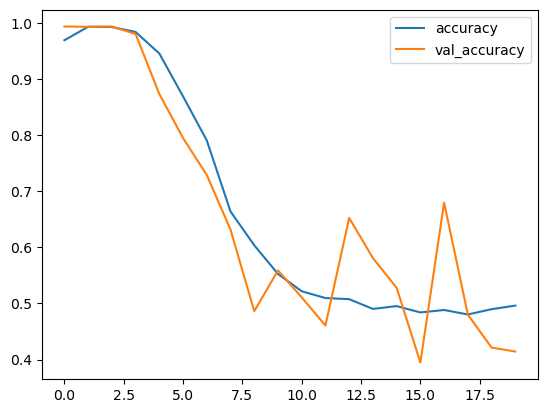

In [13]:
history_plots(r,'accuracy')

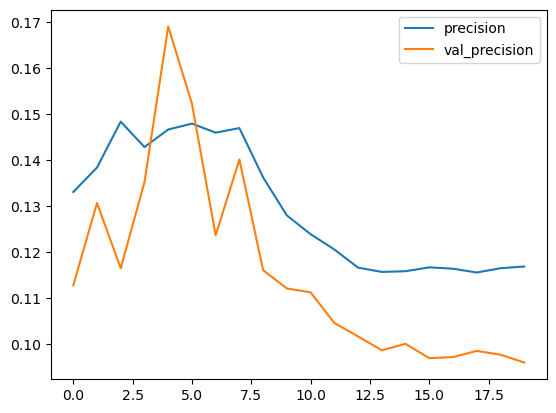

In [14]:
history_plots(r,'precision')

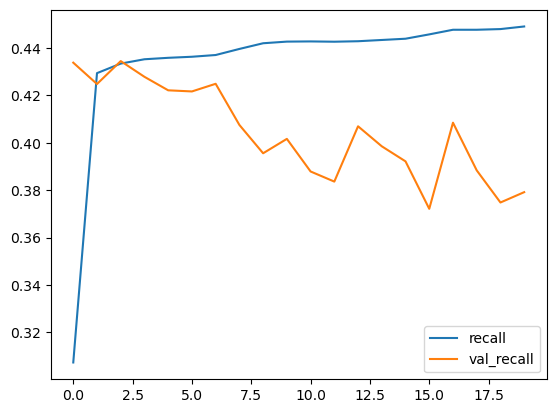

In [15]:
history_plots(r,'recall')

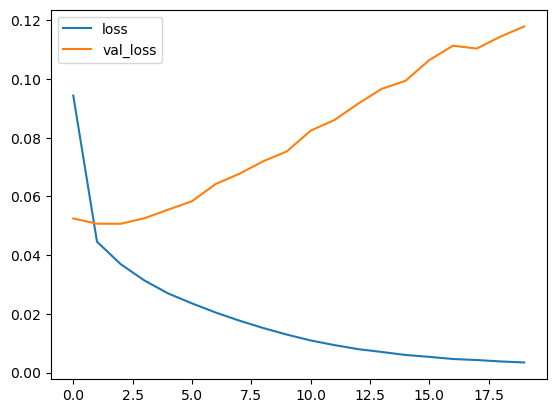

In [16]:
history_plots(r,'loss')

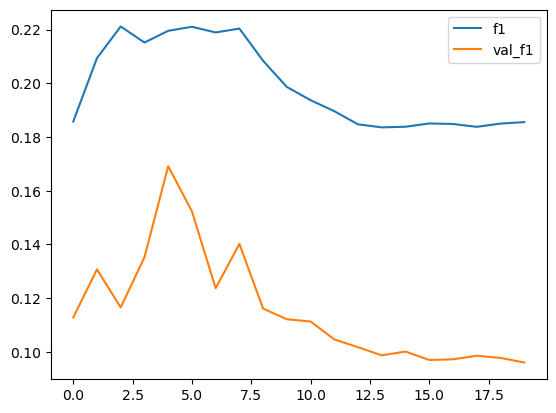

In [17]:
f1_derive(r,'precision','recall')

In [21]:
filename= "RNN_02_p"
tb = TensorBoard(log_dir= "logs\\{}".format(filename))

In [22]:
D=60
M= 32

i = Input(shape=(T,))
x= Embedding(V+1, D) (i)
x= LSTM(M, return_sequences=True)(x)
x= GlobalMaxPooling1D()(x)
x= Dense(6, activation='softmax')(x)

model2= Model(i,x)

In [23]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=[ 'accuracy',Recall(name='recall'),Precision(name='precision')])

p= model2.fit(data_train, ytrain, epochs=20, validation_data=(data_valid, yvalid),callbacks=[tb])

Epoch 1/20
3491/3491 [==============================] - 873s 250ms/step - loss: 0.1475 - accuracy: 0.9602 - recall: 0.0040 - precision: 0.0988 - val_loss: 0.1416 - val_accuracy: 0.9943 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/20
3491/3491 [==============================] - 876s 251ms/step - loss: 0.1412 - accuracy: 0.9941 - recall: 0.0013 - precision: 0.0833 - val_loss: 0.1416 - val_accuracy: 0.9943 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/20
3491/3491 [==============================] - 876s 251ms/step - loss: 0.1412 - accuracy: 0.9941 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.1414 - val_accuracy: 0.9943 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/20
3491/3491 [==============================] - 875s 251ms/step - loss: 0.1407 - accuracy: 0.9940 - recall: 6.1065e-04 - precision: 0.0336 - val_loss: 0.1116 - val_accuracy: 0.9943 - val_recall: 0.1218 - val_precision: 0.0350
Epoch 5/20
3491/3491 [======================

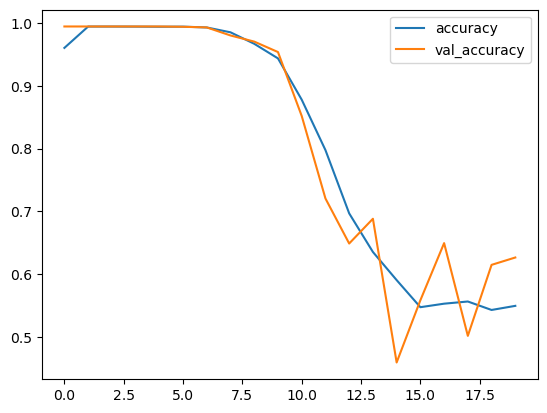

In [24]:
history_plots(p,'accuracy')

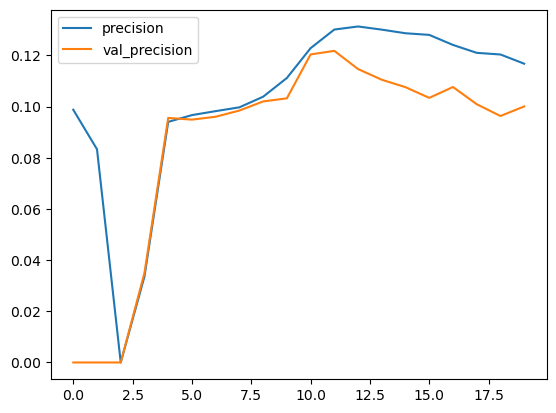

In [25]:
history_plots(p,'precision')

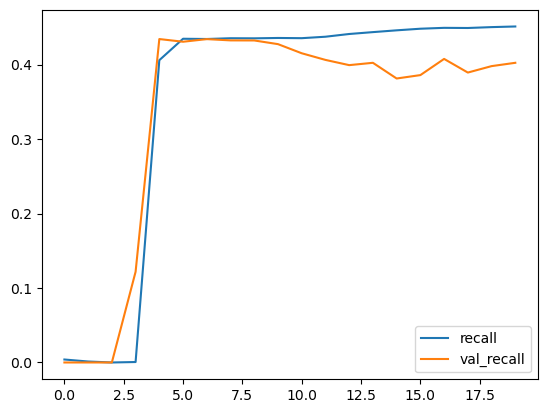

In [26]:
history_plots(p,'recall')

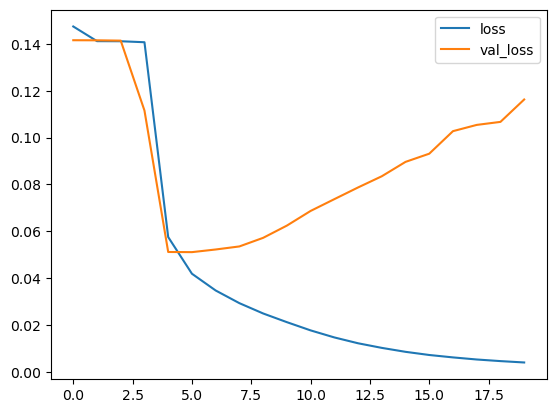

In [27]:
history_plots(p,'loss')

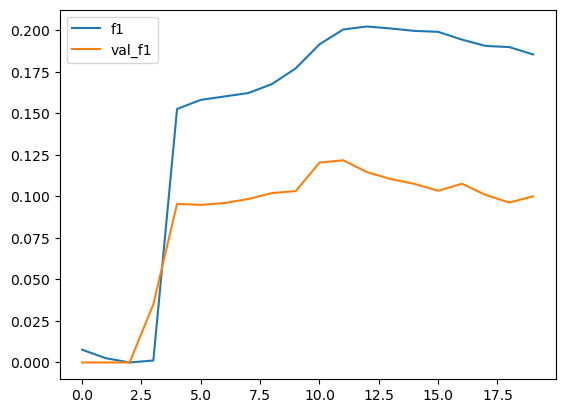

In [28]:
f1_derive(p,'precision','recall')

In [29]:
filename= "RNN_03_q"
tb = TensorBoard(log_dir= "logs\\{}".format(filename))

In [30]:
D=30
M= 32

i = Input(shape=(T,))
x= Embedding(V+1, D) (i)
x= LSTM(M, return_sequences=True)(x)
x= GlobalMaxPooling1D()(x)
x= Dense(6, activation='softmax')(x)

model3= Model(i,x)

In [31]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=[ 'accuracy',Recall(name='recall'),Precision(name='precision')])

q= model3.fit(data_train, ytrain, epochs=20, validation_data=(data_valid, yvalid), callbacks=[tb])

Epoch 1/20
3491/3491 [==============================] - 667s 191ms/step - loss: 0.0896 - accuracy: 0.9714 - recall: 0.3063 - precision: 0.1054 - val_loss: 0.0508 - val_accuracy: 0.9943 - val_recall: 0.4346 - val_precision: 0.1053
Epoch 2/20
3491/3491 [==============================] - 647s 185ms/step - loss: 0.0439 - accuracy: 0.9941 - recall: 0.4350 - precision: 0.1256 - val_loss: 0.0500 - val_accuracy: 0.9943 - val_recall: 0.4348 - val_precision: 0.0980
Epoch 3/20
3491/3491 [==============================] - 649s 186ms/step - loss: 0.0360 - accuracy: 0.9933 - recall: 0.4353 - precision: 0.1345 - val_loss: 0.0502 - val_accuracy: 0.9913 - val_recall: 0.4308 - val_precision: 0.1365
Epoch 4/20
3491/3491 [==============================] - 647s 185ms/step - loss: 0.0302 - accuracy: 0.9822 - recall: 0.4349 - precision: 0.1312 - val_loss: 0.0530 - val_accuracy: 0.9852 - val_recall: 0.4279 - val_precision: 0.1189
Epoch 5/20
3491/3491 [==============================] - 647s 185ms/step - loss: 

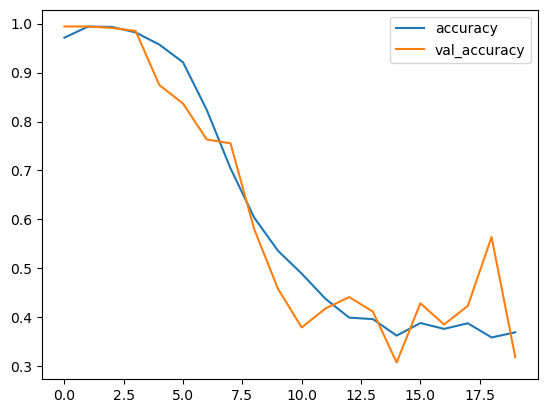

In [32]:
history_plots(q,'accuracy')

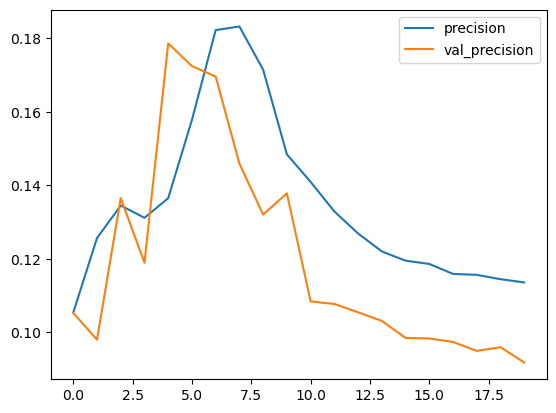

In [33]:
history_plots(q,'precision')

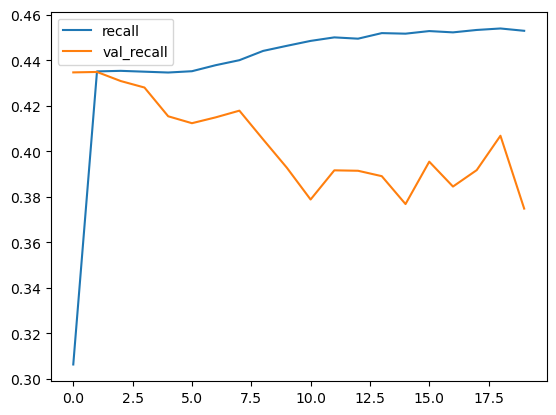

In [34]:
history_plots(q,'recall')

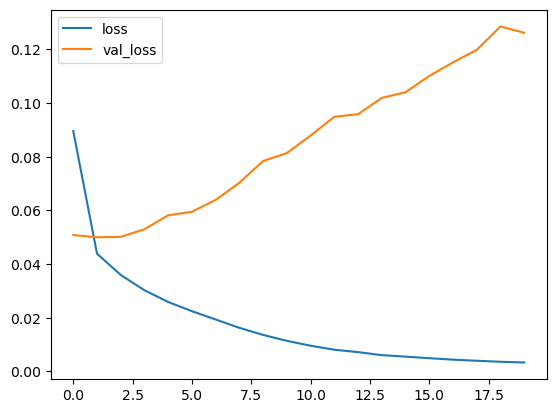

In [35]:
history_plots(q,'loss')

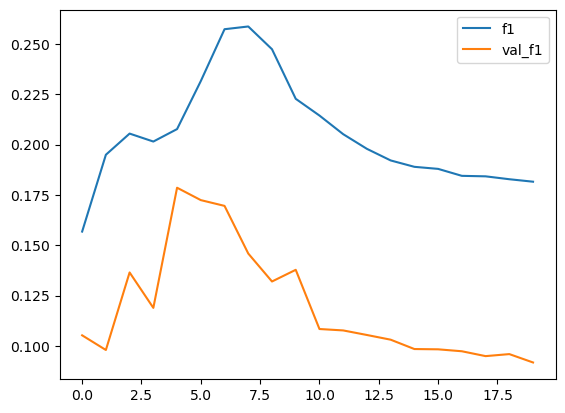

In [36]:
f1_derive(q,'precision','recall')

In [37]:
filename= "RNN_05_s"
tb = TensorBoard(log_dir= "logs\\{}".format(filename))

In [38]:
D=60
M= 35

i = Input(shape=(T,))
x= Embedding(V+1, D) (i)
x= LSTM(M, return_sequences=True)(x)
x= GlobalMaxPooling1D()(x)
x= Dense(6, activation='softmax')(x)

model5= Model(i,x)

In [39]:
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[ 'accuracy',Recall(name='recall'),Precision(name='precision')])

s= model5.fit(data_train, ytrain, epochs=20, validation_data=(data_valid, yvalid), callbacks=[tb])

Epoch 1/20
3491/3491 [==============================] - 1059s 303ms/step - loss: 0.3756 - accuracy: 0.0801 - recall: 0.0345 - precision: 0.7239 - val_loss: 0.3803 - val_accuracy: 0.0682 - val_recall: 0.1548 - val_precision: 0.7781
Epoch 2/20
3491/3491 [==============================] - 1065s 305ms/step - loss: 0.3781 - accuracy: 0.0871 - recall: 0.1328 - precision: 0.9248 - val_loss: 0.3874 - val_accuracy: 0.0791 - val_recall: 0.1438 - val_precision: 0.9583
Epoch 3/20
3491/3491 [==============================] - 1052s 301ms/step - loss: 0.3875 - accuracy: 0.0963 - recall: 0.2511 - precision: 0.8676 - val_loss: 0.3919 - val_accuracy: 0.0793 - val_recall: 0.1670 - val_precision: 0.9503
Epoch 4/20
3491/3491 [==============================] - 1058s 303ms/step - loss: 0.3985 - accuracy: 0.1334 - recall: 0.2875 - precision: 0.8683 - val_loss: 0.4068 - val_accuracy: 0.0754 - val_recall: 0.2528 - val_precision: 0.8833
Epoch 5/20
3491/3491 [==============================] - 1064s 305ms/step - l

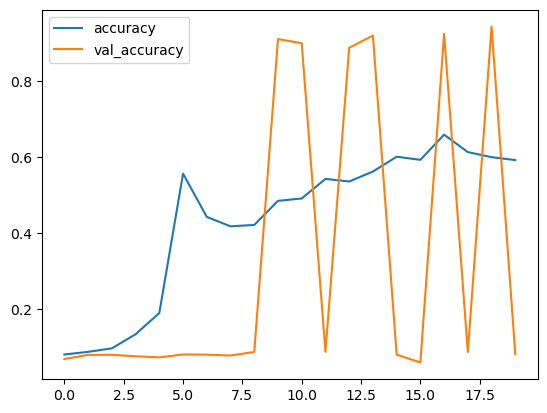

In [40]:
history_plots(s,'accuracy')

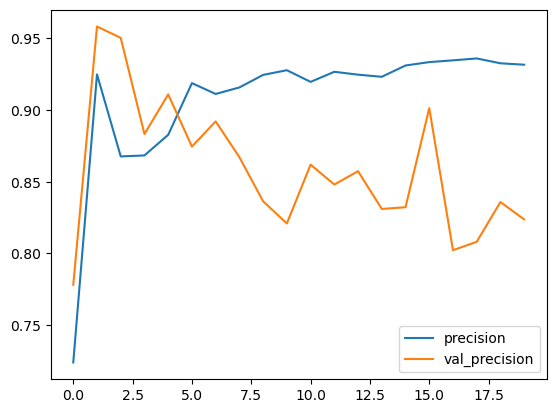

In [41]:
history_plots(s,'precision')

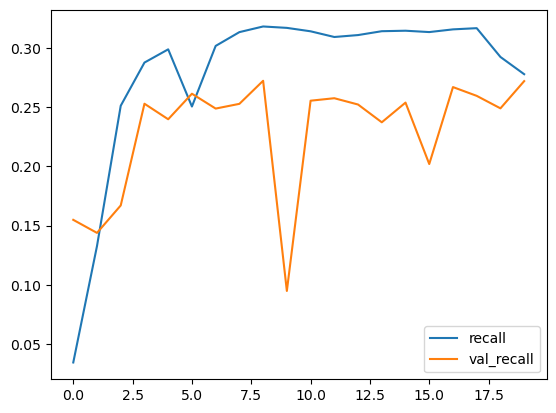

In [42]:
history_plots(s,'recall')

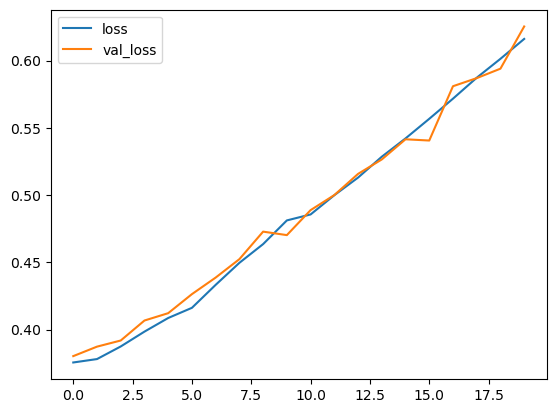

In [43]:
history_plots(s,'loss')

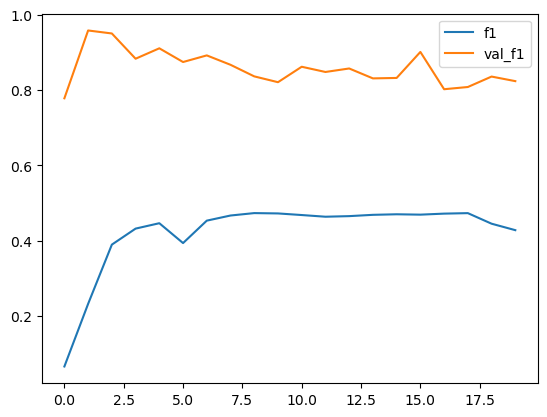

In [44]:
f1_derive(s,'precision','recall')

In [45]:
filename= "RNN_03_q"
tb = TensorBoard(log_dir= "logs\\{}".format(filename))

In [46]:
D=30
M= 32

i = Input(shape=(T,))
x= Embedding(V+1, D) (i)
x= LSTM(M, return_sequences=True)(x)
x= GlobalMaxPooling1D()(x)
x= Dense(6, activation='softmax')(x)

model3= Model(i,x)

In [47]:
model3.compile(loss="categorical_crossentropy", optimizer='adam', metrics=[ 'accuracy',Recall(name='recall'),Precision(name='precision')])

q= model3.fit(data_train, ytrain, epochs=20, validation_data=(data_valid, yvalid), callbacks=[tb])

Epoch 1/20
3491/3491 [==============================] - 665s 190ms/step - loss: 0.3410 - accuracy: 0.8893 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3382 - val_accuracy: 0.9943 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/20
3491/3491 [==============================] - 665s 190ms/step - loss: 0.3596 - accuracy: 0.9915 - recall: 0.0544 - precision: 0.7506 - val_loss: 0.3560 - val_accuracy: 0.9940 - val_recall: 0.2020 - val_precision: 0.8216
Epoch 3/20
3491/3491 [==============================] - 663s 190ms/step - loss: 0.3389 - accuracy: 0.9859 - recall: 0.2149 - precision: 0.8225 - val_loss: 0.3402 - val_accuracy: 0.9902 - val_recall: 0.2067 - val_precision: 0.8431
Epoch 4/20
3491/3491 [==============================] - 668s 191ms/step - loss: 0.3392 - accuracy: 0.9874 - recall: 0.2369 - precision: 0.8785 - val_loss: 0.3419 - val_accuracy: 0.9860 - val_recall: 0.2681 - val_precision: 0.8193
Epoch 5/20
3491/3491 [==============================] - 669s 192

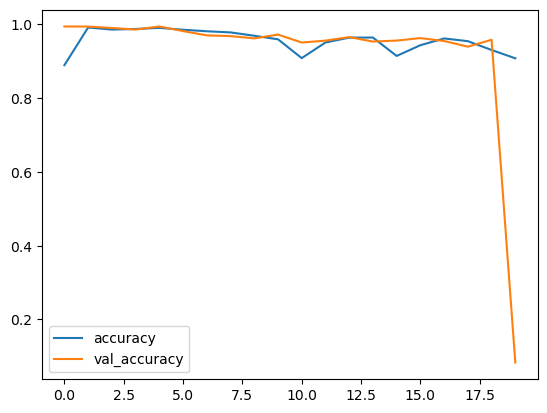

In [48]:
history_plots(q,'accuracy')

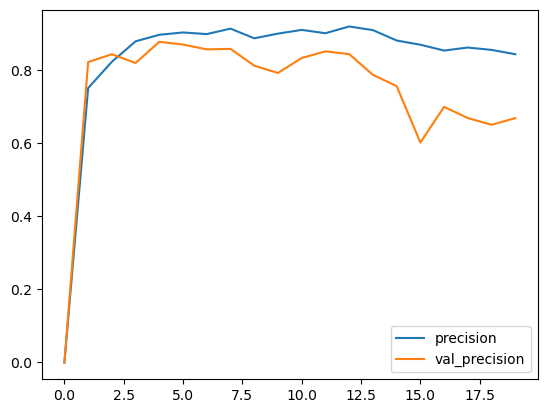

In [49]:
history_plots(q,'precision')

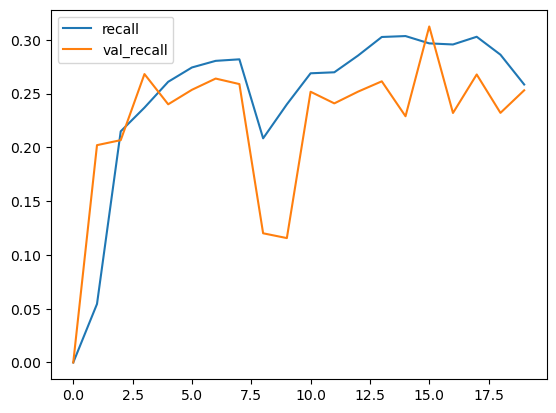

In [50]:
history_plots(q,'recall')

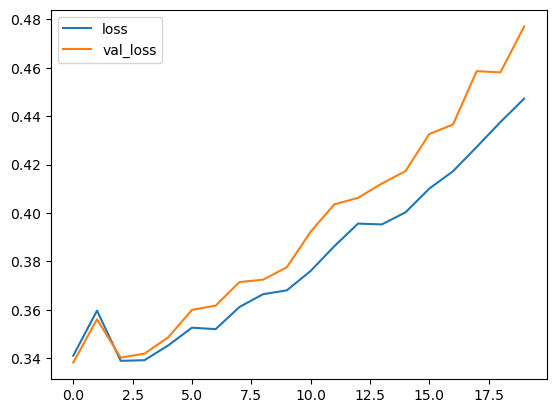

In [51]:
history_plots(q,'loss')

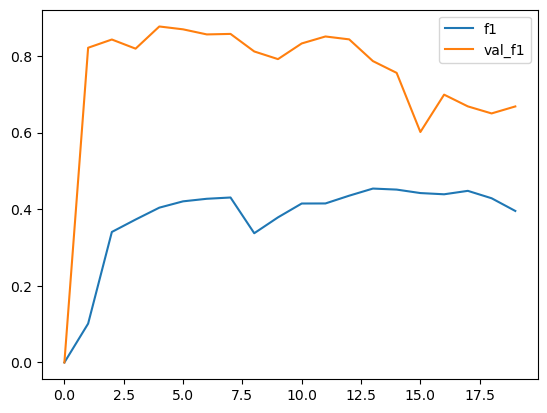

In [52]:
f1_derive(q,'precision','recall')

In [53]:
filename= "RNN_06_t"
tb = TensorBoard(log_dir= "logs\\{}".format(filename))

In [54]:
D=30
M= 16

i = Input(shape=(T,))
x= Embedding(V+1, D) (i)
x= LSTM(M, return_sequences=True)(x)
x= GlobalMaxPooling1D()(x)
x= Dense(6, activation='softmax')(x)

model6= Model(i,x)

In [55]:
model6.compile(loss="categorical_crossentropy", optimizer='adam', metrics=[ 'accuracy',Recall(name='recall'),Precision(name='precision')])

t= model6.fit(data_train, ytrain, epochs=20, validation_data=(data_valid, yvalid), callbacks=[tb])

Epoch 1/20
3491/3491 [==============================] - 638s 183ms/step - loss: 0.3580 - accuracy: 0.9465 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3509 - val_accuracy: 0.9942 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/20
3491/3491 [==============================] - 637s 182ms/step - loss: 0.3576 - accuracy: 0.9329 - recall: 0.0013 - precision: 0.5333 - val_loss: 0.3336 - val_accuracy: 0.9400 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/20
3491/3491 [==============================] - 635s 182ms/step - loss: 0.3278 - accuracy: 0.9352 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3292 - val_accuracy: 0.9340 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/20
3491/3491 [==============================] - 635s 182ms/step - loss: 0.3263 - accuracy: 0.9344 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3275 - val_accuracy: 0.9251 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/20
3491/3491 [==

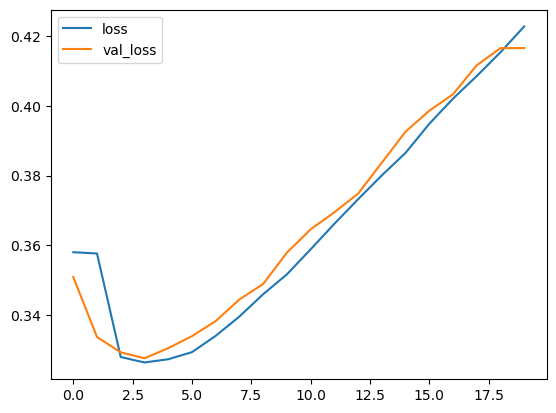

In [56]:
history_plots(t,'loss')

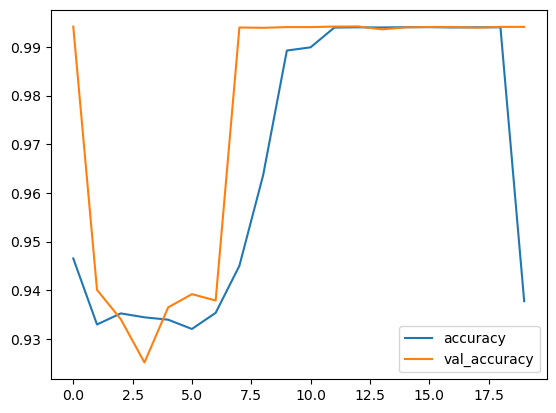

In [57]:
history_plots(t,'accuracy')

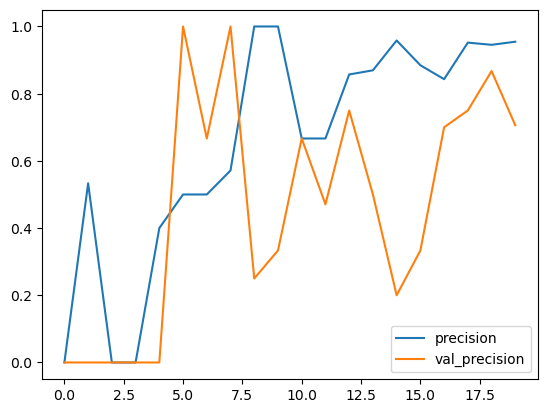

In [58]:
history_plots(t,'precision')

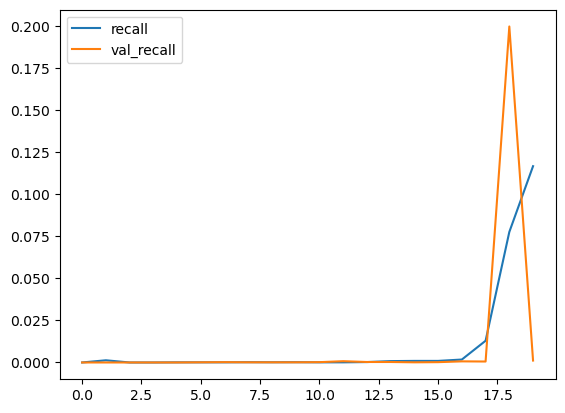

In [59]:
history_plots(t,'recall')

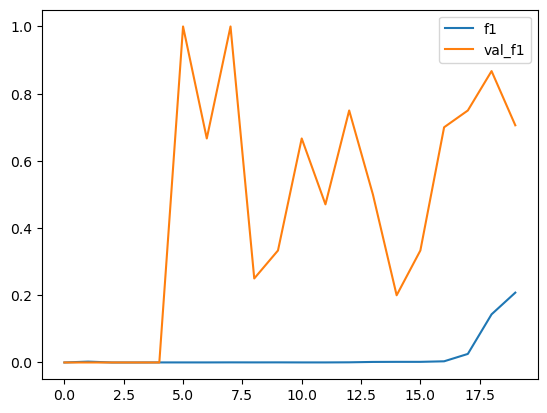

In [60]:
f1_derive(t,'precision','recall')

In [61]:
from tensorflow.keras.optimizers import SGD, Adam

In [62]:
filename= "RNN_07_w"
tb = TensorBoard(log_dir= "logs\\{}".format(filename))

In [63]:
D=30
M= 32

i = Input(shape=(T,))
x= Embedding(V+1, D) (i)
x= LSTM(M, return_sequences=True)(x)
x= GlobalMaxPooling1D()(x)
x= Dense(6, activation='softmax')(x)

model7= Model(i,x)

In [64]:
model7.compile(loss="categorical_crossentropy", optimizer=Adam(lr=.0001), metrics=[ 'accuracy',Recall(name='recall'),Precision(name='precision')])

w= model7.fit(data_train, ytrain, epochs=20, validation_data=(data_valid, yvalid), callbacks=[tb])

Epoch 1/20


C:\Users\hcade\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3491/3491 [==============================] - 615s 176ms/step - loss: 0.3604 - accuracy: 0.7487 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3488 - val_accuracy: 0.9943 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/20
3491/3491 [==============================] - 607s 174ms/step - loss: 0.3454 - accuracy: 0.9941 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3436 - val_accuracy: 0.9942 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/20
3491/3491 [==============================] - 608s 174ms/step - loss: 0.3807 - accuracy: 0.9537 - recall: 0.0242 - precision: 0.9168 - val_loss: 0.4285 - val_accuracy: 0.9365 - val_recall: 0.0726 - val_precision: 0.9096
Epoch 4/20
3491/3491 [==============================] - 606s 174ms/step - loss: 0.4624 - accuracy: 0.9300 - recall: 0.1368 - precision: 0.8216 - val_loss: 0.4711 - val_accuracy: 0.9327 - val_recall: 0.1507 - val_precision: 0.8003
Epoch 5/20
3491/3491 [==============================] - 607

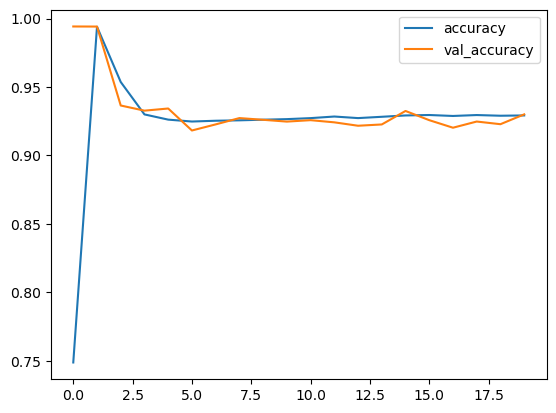

In [65]:
history_plots(w,'accuracy')

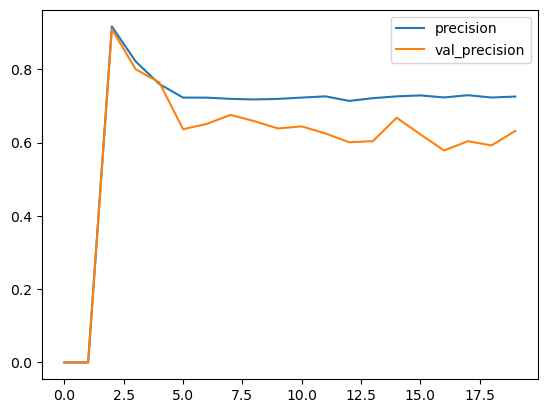

In [66]:
history_plots(w,'precision')

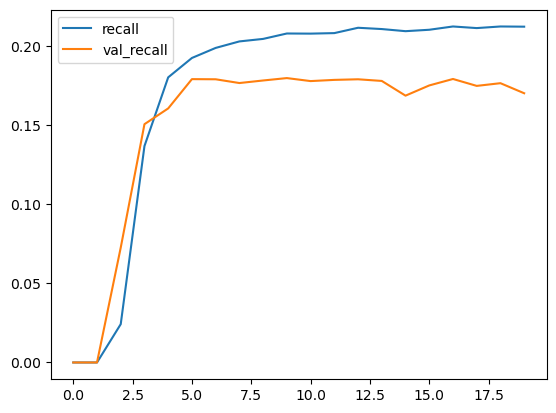

In [67]:
history_plots(w,'recall')

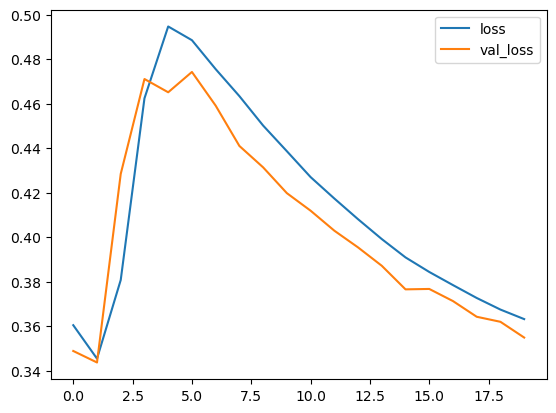

In [68]:
history_plots(w,'loss')

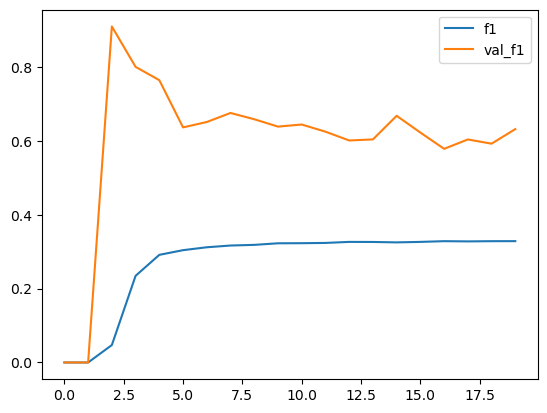

In [69]:
f1_derive(w,'precision','recall')

In [70]:
filename= "RNN_03_q"
tb = TensorBoard(log_dir= "logs\\{}".format(filename))

In [71]:
D=30
M= 32

i = Input(shape=(T,))
x= Embedding(V+1, D) (i)
x= LSTM(M, return_sequences=True)(x)
x= GlobalMaxPooling1D()(x)
x= Dense(6, activation='softmax')(x)

model3= Model(i,x)

In [72]:
model3.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=[ 'accuracy',Recall(name='recall'),Precision(name='precision')])

q= model3.fit(data_train, ytrain, epochs=20, validation_data=(data_valid, yvalid),callbacks=[tb])

Epoch 1/20
3491/3491 [==============================] - 300s 86ms/step - loss: 0.3625 - accuracy: 0.9830 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3656 - val_accuracy: 0.9943 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/20
3491/3491 [==============================] - 315s 90ms/step - loss: 0.3604 - accuracy: 0.9941 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3615 - val_accuracy: 0.9943 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/20
3491/3491 [==============================] - 315s 90ms/step - loss: 0.3603 - accuracy: 0.9941 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3603 - val_accuracy: 0.9943 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/20
3491/3491 [==============================] - 315s 90ms/step - loss: 0.3603 - accuracy: 0.9941 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 0.3621 - val_accuracy: 0.9943 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/20
3491/3491

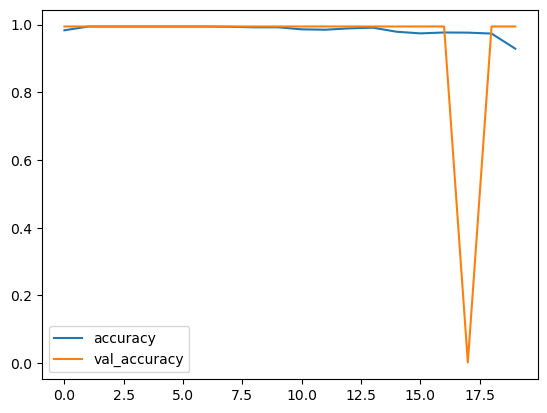

In [73]:
history_plots(q,'accuracy')

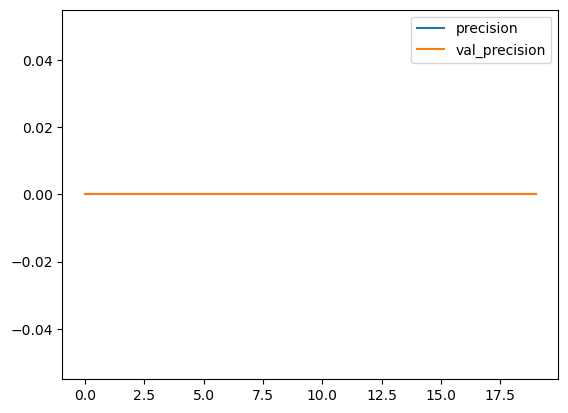

In [74]:
history_plots(q,'precision')

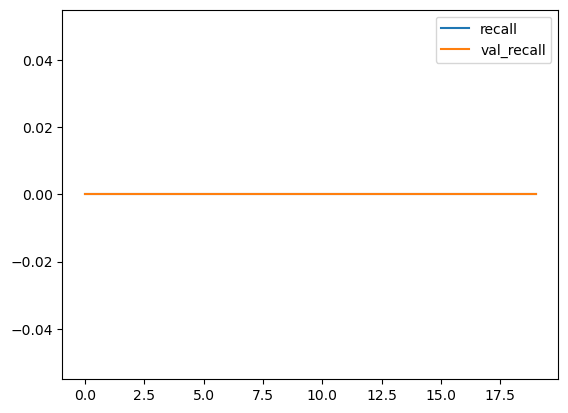

In [75]:
history_plots(q,'recall')

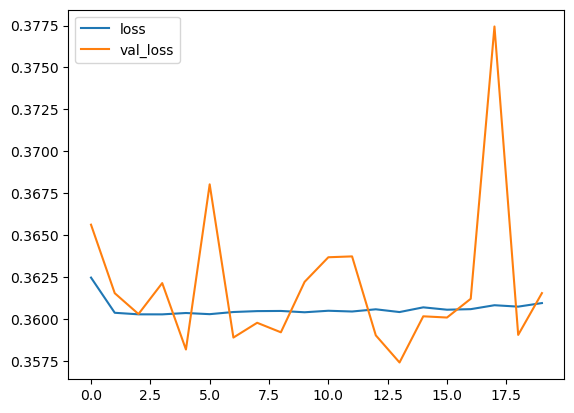

In [76]:
history_plots(q,'loss')

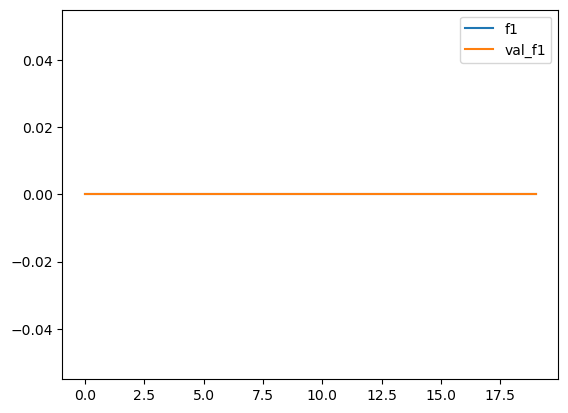

In [77]:
f1_derive(q,'precision','recall')